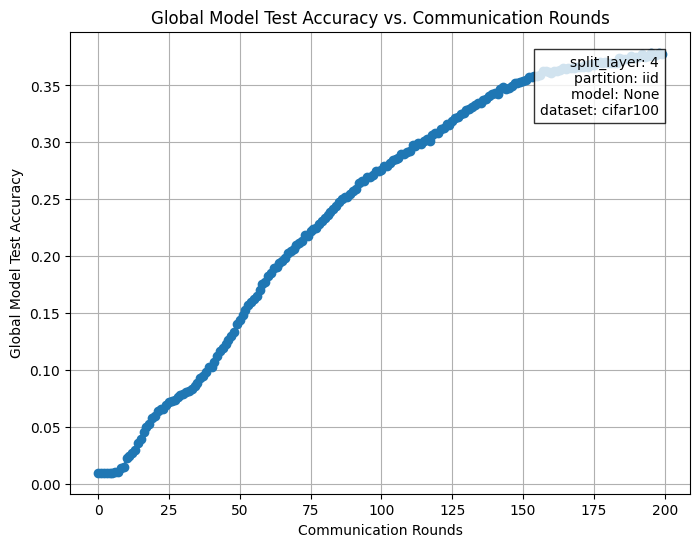

In [8]:
import re
import matplotlib.pyplot as plt

comm_rounds = []
test_accuracies = []

LOG_FILE_PATH = './logs/'
LOG_FILE = 'experiment_log-alg=sflv1_partition=iid_lr=0.001_epochs=5_num_users=100_beta=0.01_batch_size=64_opt=adam_dataset=cifar100_2024-04-11-1825-22.log'
with open(f"{LOG_FILE_PATH}{LOG_FILE}", "r") as file:
    log_content = file.read()

pattern = r"in comm round:(\d+).*?>> Global Model Test accuracy: (\d+\.\d+)"
matches = re.findall(pattern, log_content, re.DOTALL)

for match in matches:
    comm_round = int(match[0])
    test_accuracy = float(match[1])
    comm_rounds.append(comm_round)
    test_accuracies.append(test_accuracy)

def extract_hyperparameter(log_content, parameter):
    pattern = rf'"{parameter}": "?(\w+)"?,'
    match = re.search(pattern, log_content)
    if match:
        return match.group(1)
    return None

split_layer = extract_hyperparameter(log_content, "split_layer")
partition = extract_hyperparameter(log_content, "partition")
model = extract_hyperparameter(log_content, "model")
dataset = extract_hyperparameter(log_content, "dataset")

plt.figure(figsize=(8, 6))
plt.plot(comm_rounds, test_accuracies, marker="o")
plt.xlabel("Communication Rounds")
plt.ylabel("Global Model Test Accuracy")
plt.title("Global Model Test Accuracy vs. Communication Rounds")

plt.text(0.95, 0.95, f"split_layer: {split_layer}\npartition: {partition}\nmodel: {model}\ndataset: {dataset}",
         transform=plt.gca().transAxes, ha="right", va="top", fontsize=10, bbox=dict(facecolor="white", alpha=0.8))

plt.grid(True)
plt.show()